In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APP_ID               13299 non-null  int64  
 1    CIBIL_SCORE_VALUE   13299 non-null  int64  
 2   NEW_CUST             13299 non-null  object 
 3   CUS_CATGCODE         13299 non-null  int64  
 4    EMPLOYMENT_TYPE     13299 non-null  int64  
 5   AGE                  13299 non-null  int64  
 6    SEX                 13299 non-null  object 
 7    NO_OF_DEPENDENTS    13299 non-null  int64  
 8    MARITAL             13299 non-null  int64  
 9    EDU_QUA             13299 non-null  int64  
 10    P_RESTYPE          13299 non-null  int64  
 11   P_CATEGORY          13299 non-null  int64  
 12   EMPLOYEE_TYPE       13299 non-null  int64  
 13    MON_IN_OCC         13299 non-null  int64  
 14   INCOM_EXP_GMI       13299 non-null  int64  
 15  LTV                  13299 non-null 

In [4]:
#Check the number of unique value from all of the object datatype
df.nunique()

APP_ID                 13299
 CIBIL_SCORE_VALUE         3
NEW_CUST                   2
CUS_CATGCODE               2
 EMPLOYMENT_TYPE           2
AGE                       38
 SEX                       2
 NO_OF_DEPENDENTS          4
 MARITAL                   2
 EDU_QUA                   2
  P_RESTYPE                3
 P_CATEGORY                4
 EMPLOYEE_TYPE             3
  MON_IN_OCC             211
 INCOM_EXP_GMI             4
LTV                    10405
 TENURE                    4
STATUS                     2
dtype: int64

In [5]:
x = df.drop(['STATUS'], axis=1)
y =df["STATUS"]

In [6]:
y.value_counts()

0    8283
1    5016
Name: STATUS, dtype: int64

<Axes: ylabel='STATUS'>

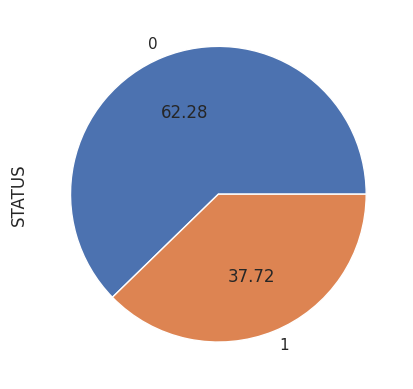

In [7]:
y.value_counts().plot.pie(autopct='%.2f')

Index(['APP_ID', 'CIBIL_SCORE_VALUE', 'NEW_CUST', 'CUS_CATGCODE',
       'EMPLOYMENT_TYPE', 'AGE', 'SEX', 'NO_OF_DEPENDENTS', 'MARITAL',
       'EDU_QUA', 'P_RESTYPE', 'P_CATEGORY', 'EMPLOYEE_TYPE', 'MON_IN_OCC',
       'INCOM_EXP_GMI', 'LTV', 'TENURE', 'STATUS'],
      dtype='object')


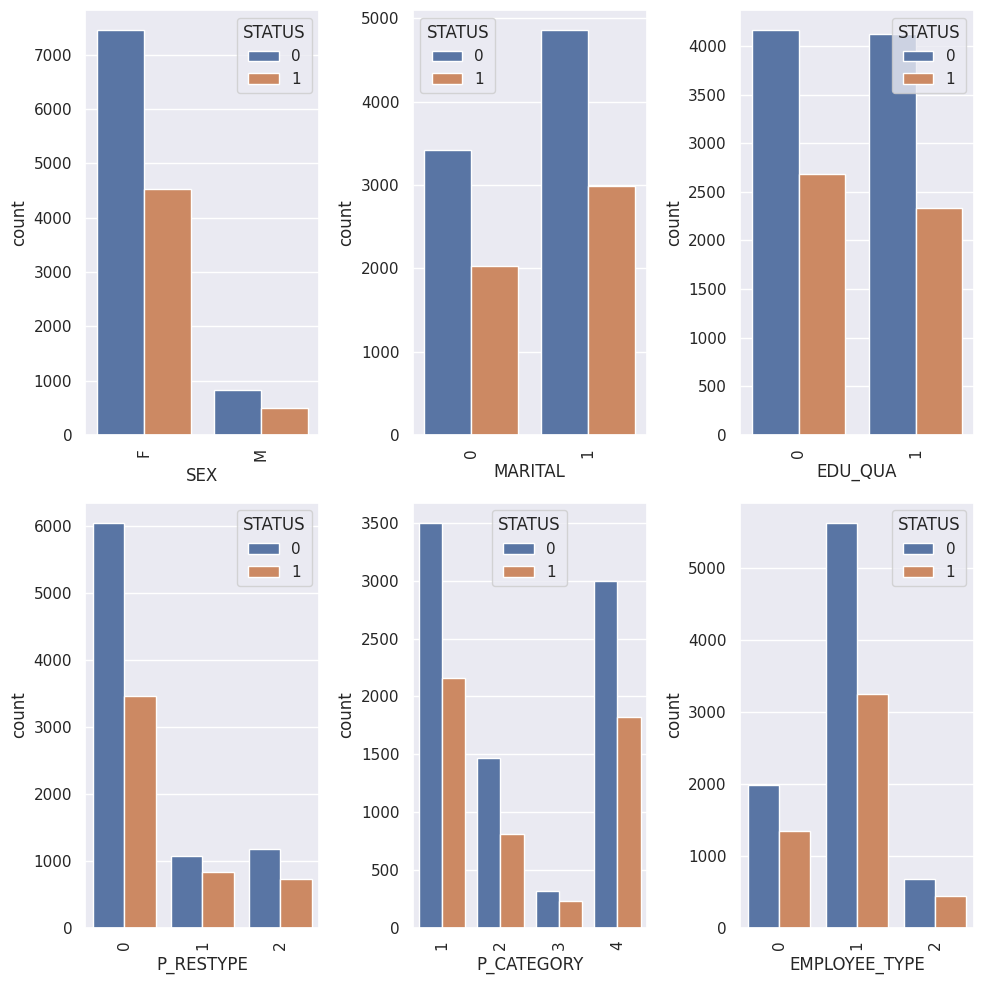

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names to verify
print(df.columns)

# List of categorical variables to plot
cat_vars = ['SEX', 'MARITAL', 'EDU_QUA', 'P_RESTYPE', 'P_CATEGORY', 'EMPLOYEE_TYPE']

# Create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axs = axs.flatten()

# Create bar plot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='STATUS', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


In [9]:
selected_columns = ['AGE', 'CIBIL_SCORE_VALUE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE', "NO_OF_DEPENDENTS"]

# Get the descriptive statistics for the selected columns
desc_stats = df[selected_columns].describe(percentiles=[.25, .50, .75])

# Print the descriptive statistics
print("Descriptive Statistics for Selected Columns:")
print(desc_stats)


Descriptive Statistics for Selected Columns:
                AGE  CIBIL_SCORE_VALUE    MON_IN_OCC  INCOM_EXP_GMI  \
count  13299.000000       13299.000000  13299.000000   13299.000000   
mean      32.473870           1.037898     74.508760       0.751259   
std        8.804317           0.865391     72.971951       0.938441   
min       18.000000           0.000000      1.000000       0.000000   
25%       25.000000           0.000000     24.000000       0.000000   
50%       31.000000           1.000000     48.000000       0.000000   
75%       38.000000           2.000000    100.000000       1.000000   
max       55.000000           2.000000    398.000000       3.000000   

                LTV        TENURE  NO_OF_DEPENDENTS  
count  13299.000000  13299.000000      13299.000000  
mean       0.776054     24.792240          1.536281  
std        0.126130      7.501085          0.971671  
min        0.007508     12.000000          0.000000  
25%        0.719710     18.000000          1.

In [10]:
!pip install PrettyTable
from prettytable import PrettyTable

desc_stats = {
    'AGE': [13299, 32.47, 8.80, 18, 25, 31, 38, 55],
    'CIBIL_SCORE_VALUE': [13299, 1.04, 0.87, 0, 0, 1, 2, 2],
    'MON_IN_OCC': [13299, 74.51, 72.97, 1, 24, 48, 100, 398],
    'INCOM_EXP_GMI': [13299, 0.75, 0.94, 0, 0, 0, 1, 3],
    'LTV': [13299, 0.78, 0.13, 0.01, 0.72, 0.81, 0.85, 1.00],
    'TENURE': [13299, 24.79, 7.50, 12, 18, 24, 36, 36],
    'NO_OF_DEPENDENTS': [13299, 1.54, 0.97, 0, 1, 2, 2, 3]
}

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Column', 'Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max']

# Add rows to the table
for col, stats in desc_stats.items():
    table.add_row([col] + stats)

# Print the table
print("Descriptive Statistics for Selected Columns:")
print(table)


Descriptive Statistics for Selected Columns:
+-------------------+-------+-------+---------+------+------+------+------+-----+
|       Column      | Count |  Mean | Std Dev | Min  | 25%  | 50%  | 75%  | Max |
+-------------------+-------+-------+---------+------+------+------+------+-----+
|        AGE        | 13299 | 32.47 |   8.8   |  18  |  25  |  31  |  38  |  55 |
| CIBIL_SCORE_VALUE | 13299 |  1.04 |   0.87  |  0   |  0   |  1   |  2   |  2  |
|     MON_IN_OCC    | 13299 | 74.51 |  72.97  |  1   |  24  |  48  | 100  | 398 |
|   INCOM_EXP_GMI   | 13299 |  0.75 |   0.94  |  0   |  0   |  0   |  1   |  3  |
|        LTV        | 13299 |  0.78 |   0.13  | 0.01 | 0.72 | 0.81 | 0.85 | 1.0 |
|       TENURE      | 13299 | 24.79 |   7.5   |  12  |  18  |  24  |  36  |  36 |
|  NO_OF_DEPENDENTS | 13299 |  1.54 |   0.97  |  0   |  1   |  2   |  2   |  3  |
+-------------------+-------+-------+---------+------+------+------+------+-----+


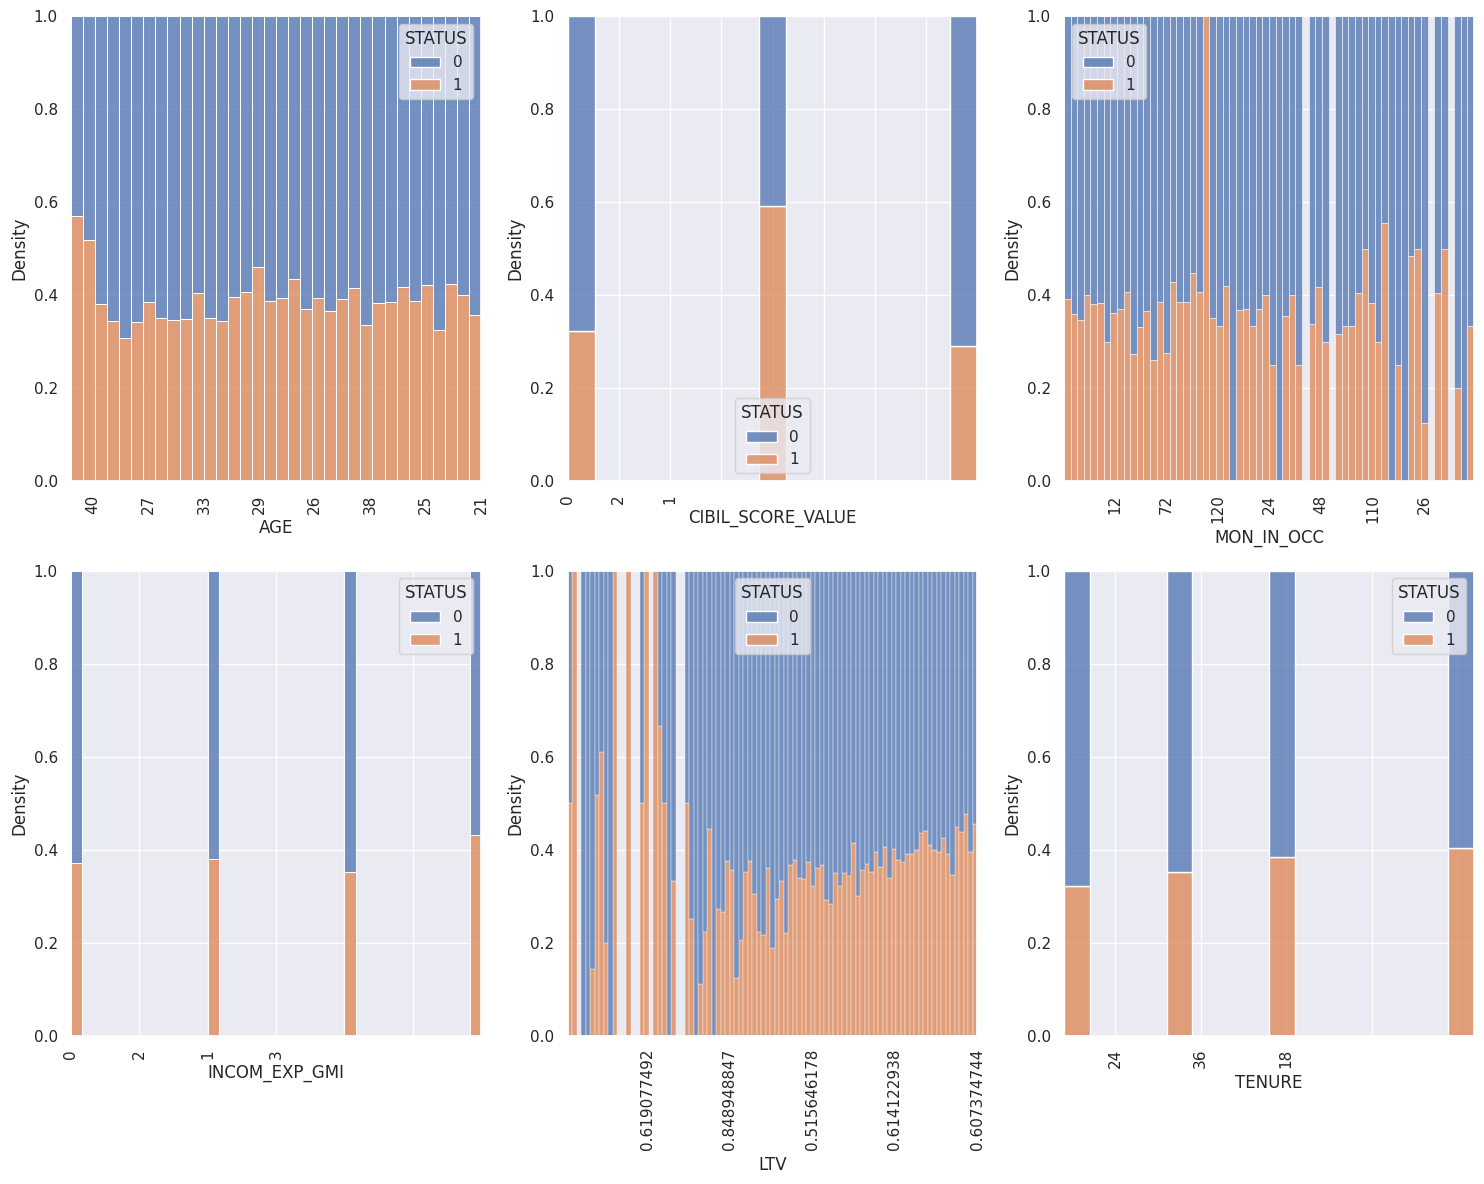

In [11]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = [ 'AGE', 'CIBIL_SCORE_VALUE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV',  'TENURE']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='STATUS', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

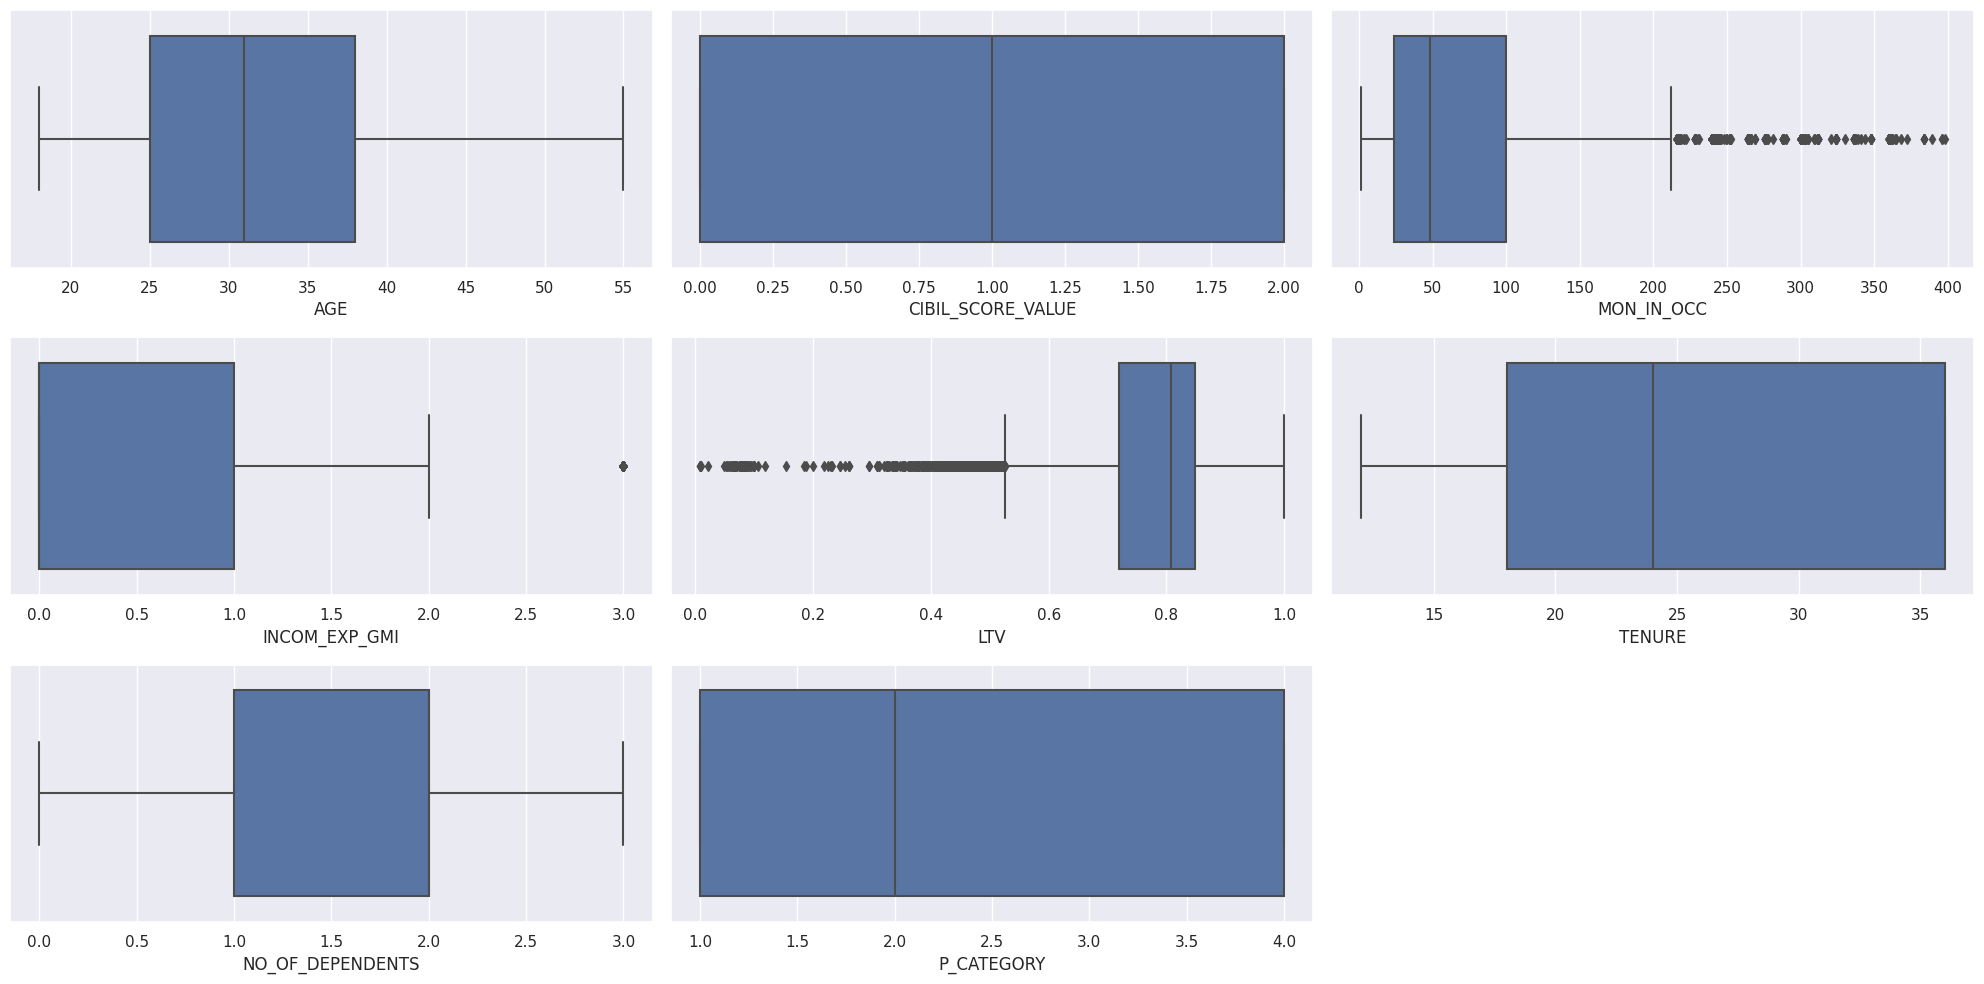

In [12]:
num_vars = ['AGE', 'CIBIL_SCORE_VALUE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE', "NO_OF_DEPENDENTS", "P_CATEGORY","EMPLOYEE_TYPE"]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

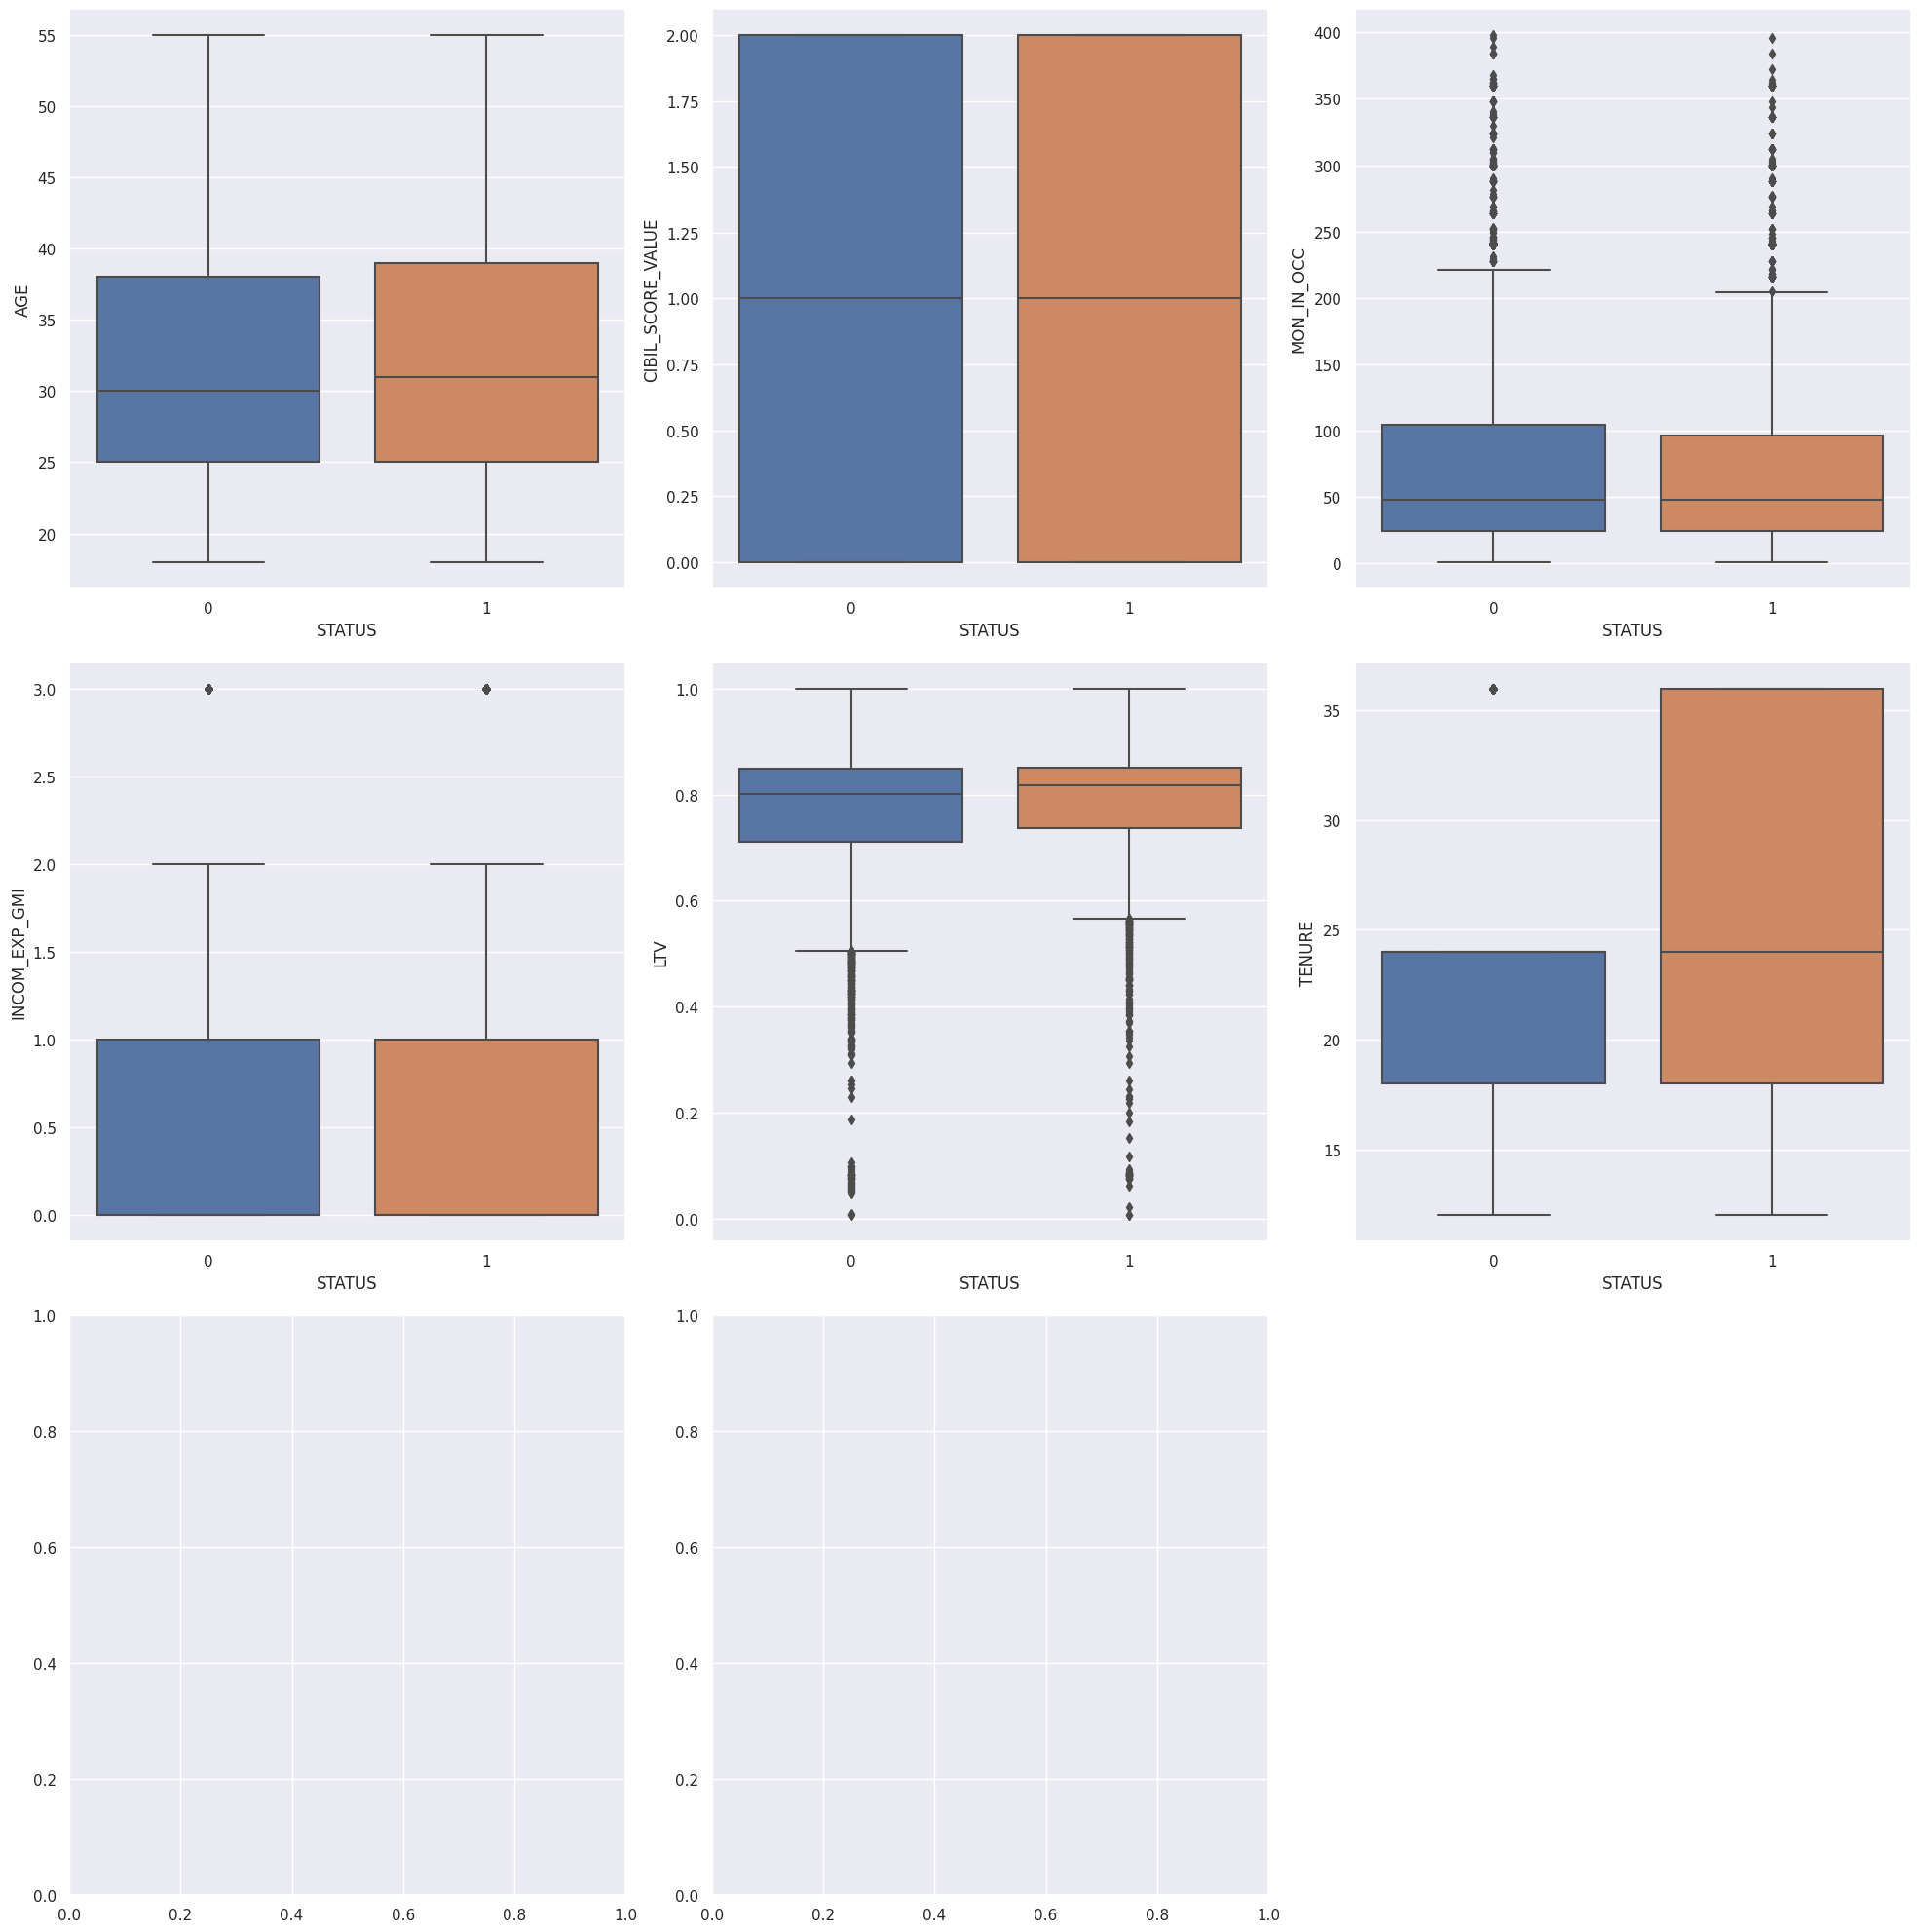

In [13]:
num_vars = ['AGE', 'CIBIL_SCORE_VALUE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='STATUS', data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

In [14]:
num_vars = [ 'CIBIL_SCORE_VALUE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE']

for var in num_vars:
    # Calculate IQR
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Get outliers for both status 0 and 1
    outliers_0 = df[(df[var] < lower_bound) | (df[var] > upper_bound)]['STATUS'].sum()
    outliers_1 = df[(df[var] < lower_bound) | (df[var] > upper_bound)]['STATUS'].count() - outliers_0

    print(f"Variable: {var}")
    print(f"Outliers for Status 0: {outliers_0}")
    print(f"Outliers for Status 1: {outliers_1}")
    print("---------------------------")


Variable: CIBIL_SCORE_VALUE
Outliers for Status 0: 0
Outliers for Status 1: 0
---------------------------
Variable: MON_IN_OCC
Outliers for Status 0: 360
Outliers for Status 1: 646
---------------------------
Variable: INCOM_EXP_GMI
Outliers for Status 0: 480
Outliers for Status 1: 632
---------------------------
Variable: LTV
Outliers for Status 0: 157
Outliers for Status 1: 362
---------------------------
Variable: TENURE
Outliers for Status 0: 0
Outliers for Status 1: 0
---------------------------


Value at 95th percentile: 240.0


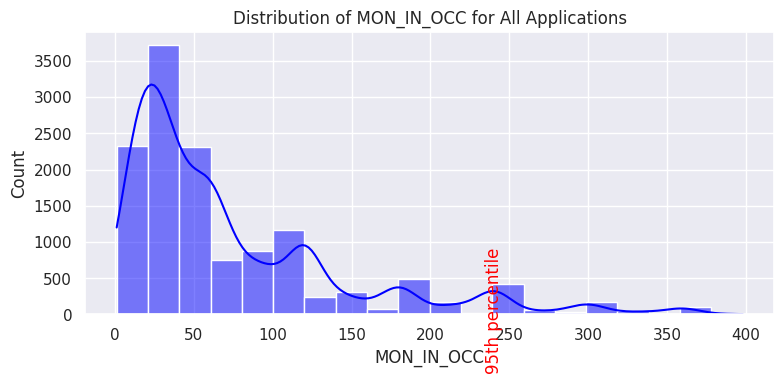

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a distribution plot for 'MON_IN_OCC' for all applications
plt.figure(figsize=(8, 4))
plt.title('Distribution of MON_IN_OCC for All Applications')
sns.histplot(df['MON_IN_OCC'], bins=20, color='blue', kde=True)
plt.xlabel('MON_IN_OCC')

# Calculate and print the value that holds the 95th percentile
percentile_95 = df['MON_IN_OCC'].quantile(0.95)
print("Value at 95th percentile:", percentile_95)

# Add text annotation for the 95th percentile
plt.text(percentile_95, 50, '95th percentile', rotation=90, va='center', ha='center', color='red')

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd


# Calculate the value that holds the 95th percentile
percentile_95 = df['MON_IN_OCC'].quantile(0.95)

# Filter the DataFrame to include only rows where 'MON_IN_OCC' is less than or equal to the 95th percentile value
num_within_95_percentile = df[df['MON_IN_OCC'] <= percentile_95].shape[0]

# Filter the DataFrame to include only rows where 'MON_IN_OCC' is greater than the 95th percentile value
num_after_95_percentile = df[df['MON_IN_OCC'] > percentile_95].shape[0]

# Print the count of variables within and after the 95th percentile
print("Number of Variables within the 95th percentile:", num_within_95_percentile)
print("Number of Variables after the 95th percentile:", num_after_95_percentile)


Number of Variables within the 95th percentile: 12797
Number of Variables after the 95th percentile: 502


   INCOM_EXP_GMI  Count
0              0   6809
1              1   4101
2              2   1277
3              3   1112


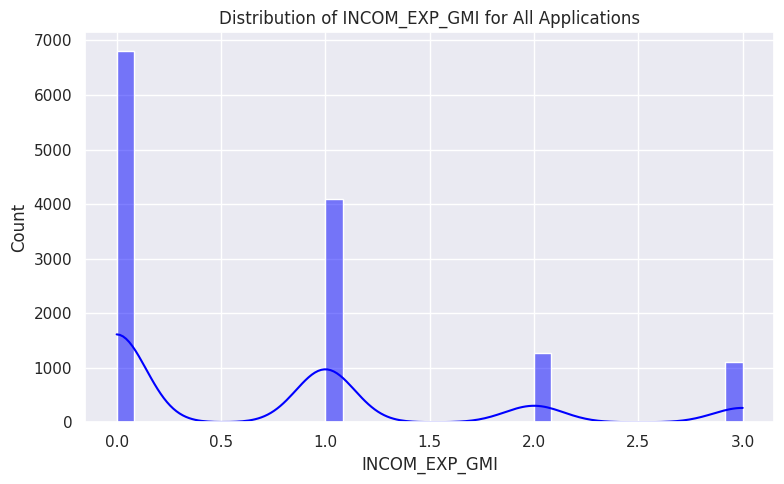

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in a DataFrame called 'df'

# Create a distribution plot for 'INCOM_EXP_GMI' for all applications
plt.figure(figsize=(8, 5))
plt.title('Distribution of INCOM_EXP_GMI for All Applications')
sns.histplot(df['INCOM_EXP_GMI'], color='blue', kde=True)
plt.xlabel('INCOM_EXP_GMI')

# Calculate and print the count of each value in the 'INCOM_EXP_GMI' column
count_per_value = df['INCOM_EXP_GMI'].value_counts().reset_index()
count_per_value.columns = ['INCOM_EXP_GMI', 'Count']
print(count_per_value)

plt.tight_layout()
plt.show()


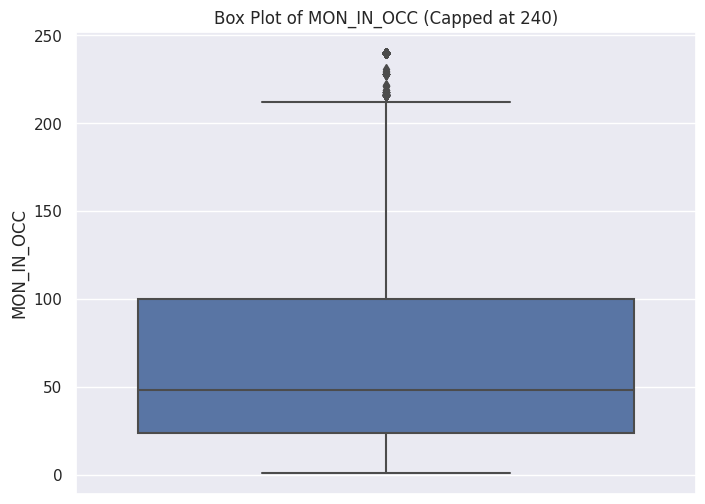

In [18]:
capped_value = 240
df['MON_IN_OCC'] = df['MON_IN_OCC'].apply(lambda x: capped_value if x > capped_value else x)

# Create the box plot for the capped 'MON_IN_OCC'
plt.figure(figsize=(8, 6))
sns.boxplot(y='MON_IN_OCC', data=df)
plt.title("Box Plot of MON_IN_OCC (Capped at 240)")
plt.show()

I opted for a stratagem of capping the dataset, specifically up to the 95th percentile. This percentile threshold culminates at the numerical magnitude of 240, thereby translating to a span of precisely 20 years. This judicious capping approach aids in mitigating the potential influence of outliers, ensuring that the dataset retains its integrity while emphasizing the more representative range of values.

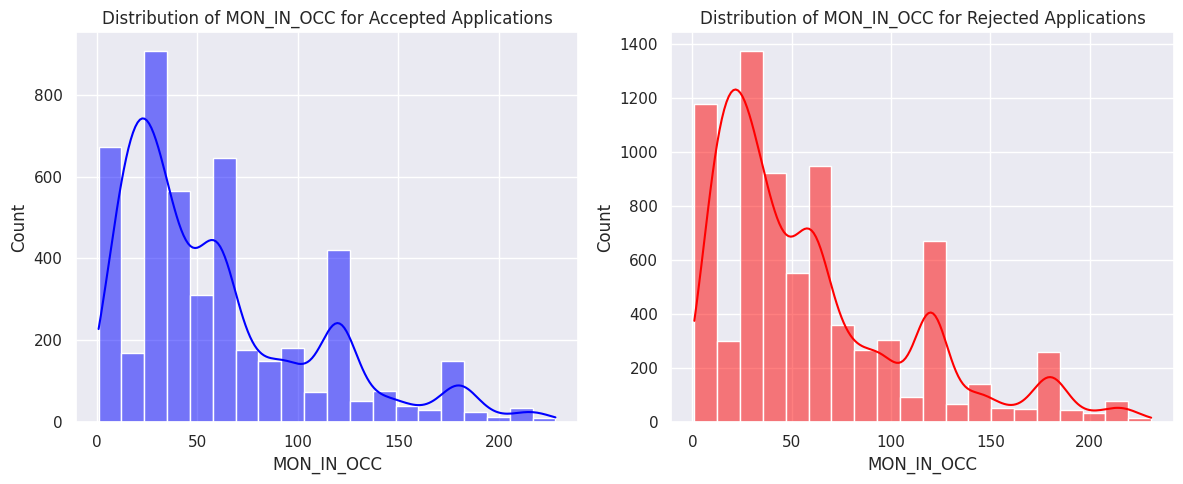

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the value that holds the 95th percentile
percentile_95 = df['MON_IN_OCC'].quantile(0.95)

# Filter the DataFrame to include only rows where 'MON_IN_OCC' is greater than 240
num_after_cap_df = df[df['MON_IN_OCC'] < 240]

# Split the DataFrame into accepted and rejected applications
accepted_df = num_after_cap_df[num_after_cap_df['STATUS'] == 1]
rejected_df = num_after_cap_df[num_after_cap_df['STATUS'] == 0]

# Create two distribution plots for 'MON_IN_OCC' for accepted and rejected applications
plt.figure(figsize=(12, 5))

# Plot for accepted applications
plt.subplot(1, 2, 1)
plt.title('Distribution of MON_IN_OCC for Accepted Applications')
sns.histplot(accepted_df['MON_IN_OCC'], bins=20, color='blue', kde=True)
plt.xlabel('MON_IN_OCC')
# Count of accepted applications
accepted_count = accepted_df['MON_IN_OCC'].count()
#plt.text(240, 400, f'Accepted: {accepted_count}', ha='right')

# Plot for rejected applications
plt.subplot(1, 2, 2)
plt.title('Distribution of MON_IN_OCC for Rejected Applications')
sns.histplot(rejected_df['MON_IN_OCC'], bins=20, color='red', kde=True)
plt.xlabel('MON_IN_OCC')
# Count of rejected applications
rejected_count = rejected_df['MON_IN_OCC'].count()
#plt.text(240, 400, f'Rejected: {rejected_count}', ha='right')

plt.tight_layout()
plt.show()

# Print the total number of variables after the cap of 240
#print("Total Number of Variables after the Cap of 240:", num_after_cap_df.shape[0])


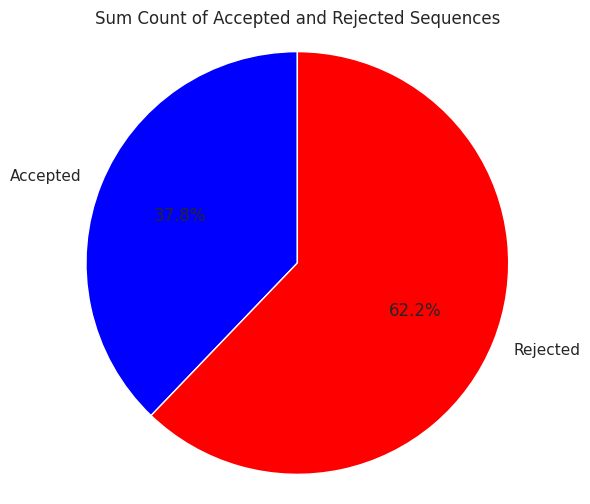

In [20]:
labels = ['Accepted', 'Rejected']

# Combine the sum counts
sum_counts = [accepted_count.sum(), rejected_count.sum()]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sum_counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Sum Count of Accepted and Rejected Sequences')
plt.axis('equal')

# Show the pie chart
plt.show()

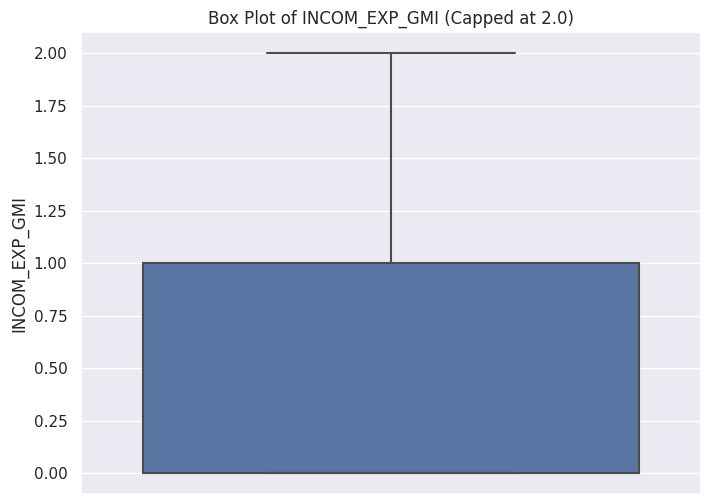

In [21]:
capped_value = 2.0
df['INCOM_EXP_GMI'] = df['INCOM_EXP_GMI'].apply(lambda x: capped_value if x > capped_value else x)

# Create the box plot for the capped 'MON_IN_OCC'
plt.figure(figsize=(8, 6))
sns.boxplot(y='INCOM_EXP_GMI', data=df)
plt.title("Box Plot of INCOM_EXP_GMI (Capped at 2.0)")
plt.show()

Capping the INCOME_EXP_GMI rating at 2.0 prevents overestimation of income and expense ratios, ensuring more conservative risk assessment and avoiding potential lending decisions based on extreme outlier ratings that might not accurately reflect the borrower's financial health.

Count of variables with value 0 in 'INCOM_EXP_GMI': 6809
Count of variables with value 1 in 'INCOM_EXP_GMI': 4101
Count of variables with value 2 in 'INCOM_EXP_GMI': 2389
Sum of all counts: 13299


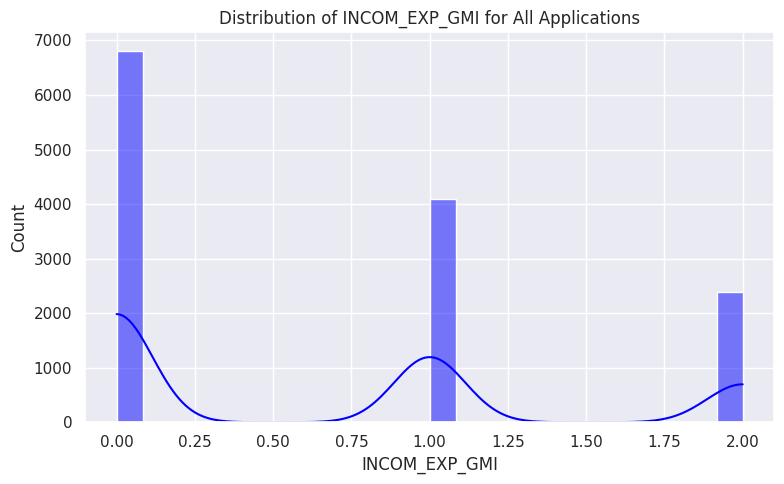

   INCOM_EXP_GMI  Count
0            0.0   6809
1            1.0   4101
2            2.0   2389


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.title('Distribution of INCOM_EXP_GMI for All Applications')
sns.histplot(df['INCOM_EXP_GMI'], color='blue', kde=True)
plt.xlabel('INCOM_EXP_GMI')

# Calculate the count of variables with values 0, 1, and 2 in 'INCOM_EXP_GMI' column
count_0 = df[df['INCOM_EXP_GMI'] == 0].shape[0]
count_1 = df[df['INCOM_EXP_GMI'] == 1].shape[0]
count_2 = df[df['INCOM_EXP_GMI'] == 2].shape[0]

# Print the count of variables with values 0, 1, and 2
print("Count of variables with value 0 in 'INCOM_EXP_GMI':", count_0)
print("Count of variables with value 1 in 'INCOM_EXP_GMI':", count_1)
print("Count of variables with value 2 in 'INCOM_EXP_GMI':", count_2)

# Calculate the sum of all the counts
sum_of_counts = count_0 + count_1 + count_2
print("Sum of all counts:", sum_of_counts)

plt.tight_layout()
plt.show()
count_per_value = df['INCOM_EXP_GMI'].value_counts().reset_index()
count_per_value.columns = ['INCOM_EXP_GMI', 'Count']
print(count_per_value)


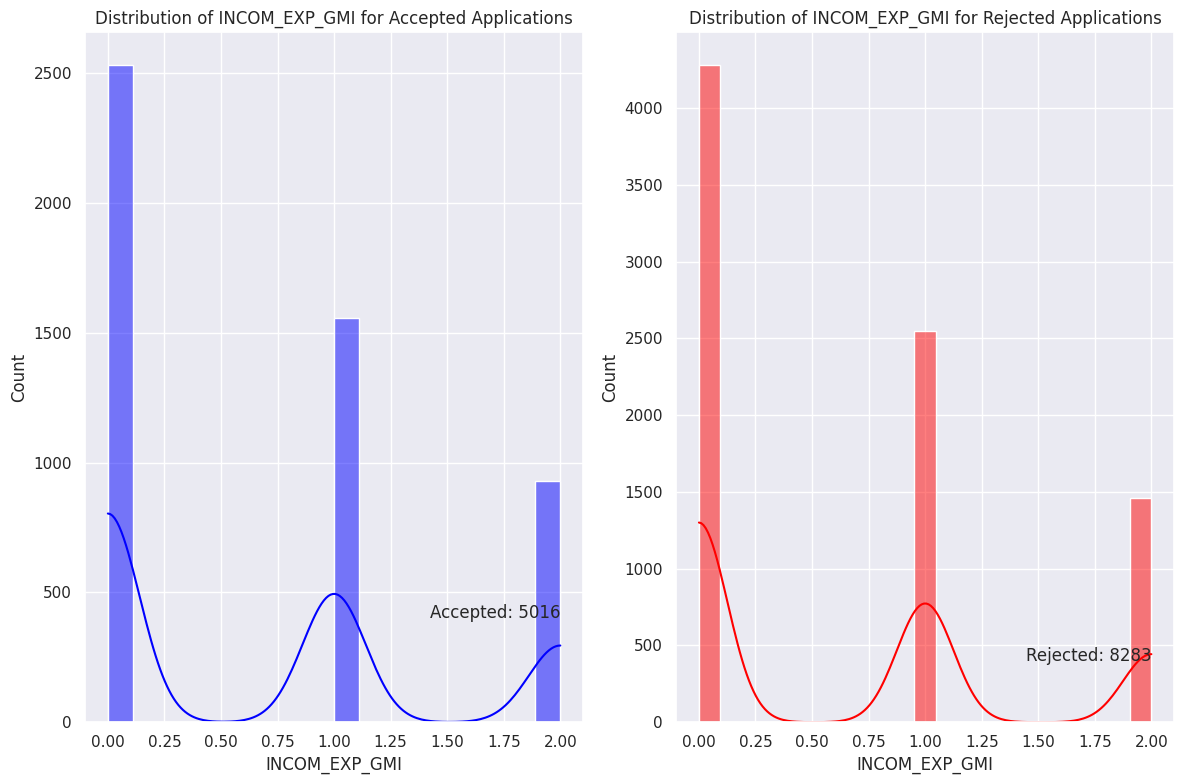

Total Number of Variables after the Cap of 2: 13299


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where 'INCOM_EXP_GMI' is less than or equal to 2
num_after_cap_df = df[df['INCOM_EXP_GMI'] <= 2]

# Split the DataFrame into accepted and rejected applications
accepted_df = num_after_cap_df[num_after_cap_df['STATUS'] == 1]
rejected_df = num_after_cap_df[num_after_cap_df['STATUS'] == 0]

# Create two distribution plots for 'INCOM_EXP_GMI' for accepted and rejected applications
plt.figure(figsize=(12, 8))

# Plot for accepted applications
plt.subplot(1, 2, 1)
plt.title('Distribution of INCOM_EXP_GMI for Accepted Applications')
sns.histplot(accepted_df['INCOM_EXP_GMI'], color='blue', kde=True)
plt.xlabel('INCOM_EXP_GMI')
# Count of accepted applications
accepted_count = accepted_df['INCOM_EXP_GMI'].count()
plt.text(2, 400, f'Accepted: {accepted_count}', ha='right')

# Plot for rejected applications
plt.subplot(1, 2, 2)
plt.title('Distribution of INCOM_EXP_GMI for Rejected Applications')
sns.histplot(rejected_df['INCOM_EXP_GMI'], color='red', kde=True)
plt.xlabel('INCOM_EXP_GMI')
# Count of rejected applications
rejected_count = rejected_df['INCOM_EXP_GMI'].count()
plt.text(2, 400, f'Rejected: {rejected_count}', ha='right')

plt.tight_layout()
plt.show()

# Print the total number of variables after the cap of 2
print("Total Number of Variables after the Cap of 2:", num_after_cap_df.shape[0])


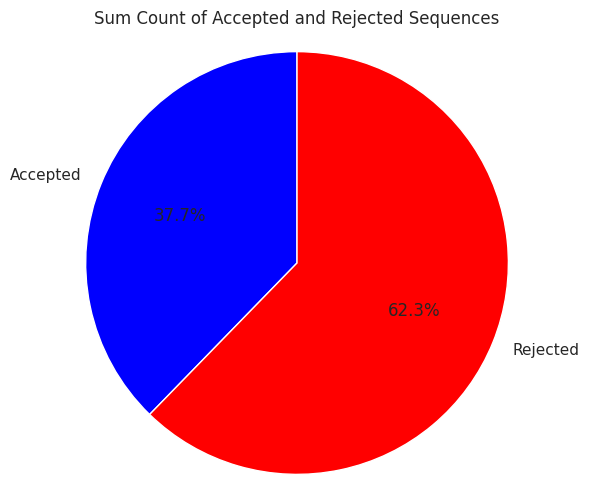

In [24]:
labels = ['Accepted', 'Rejected']

# Combine the sum counts
sum_counts = [accepted_count.sum(), rejected_count.sum()]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sum_counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Sum Count of Accepted and Rejected Sequences')
plt.axis('equal')

# Show the pie chart
plt.show()

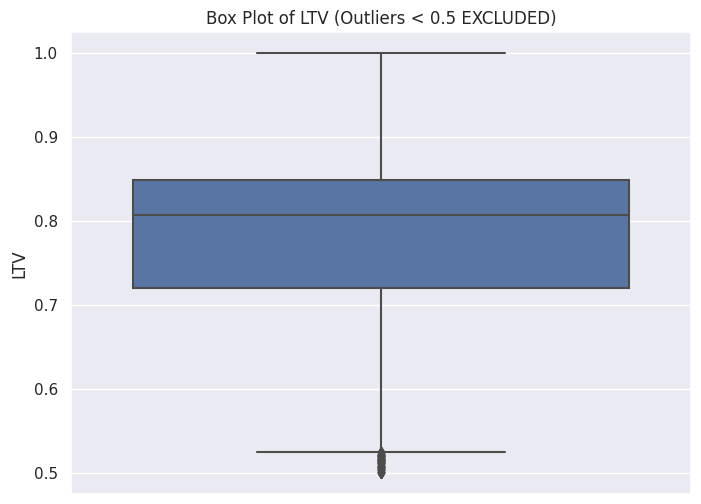

In [25]:
# Calculate IQR for LTV
q1 = df['LTV'].quantile(0.25)
q3 = df['LTV'].quantile(0.75)
iqr = q3 - q1

# Define lower bound for outliers
lower_bound = q1 - 1.5 * iqr

# Exclude outliers less than 0.5 by capping them at the lower bound
df['LTV'] = df['LTV'].apply(lambda x: lower_bound if x < lower_bound and x < 0.5 else x)

# Create the box plot for the capped 'LTV'
plt.figure(figsize=(8, 6))
sns.boxplot(y='LTV', data=df)
plt.title("Box Plot of LTV (Outliers < 0.5 EXCLUDED)")
plt.show()


The Loan-to-Value (LTV) ratio is a crucial measure used in assessing the risk associated with a loan. In my analysis, I have taken the liberty to exclude all LTV outliers below 0.5, which aligns with the standard threshold commonly used by financial institutions. This approach ensures that our evaluation maintains a level consistent with industry practices, making the results more meaningful and relevant for decision-making. By focusing on the pre-calculated asset and loan ratio within this acceptable range, we can derive more insightful and intelligent insights for our analysis.

Index(['APP_ID', 'CIBIL_SCORE_VALUE', 'NEW_CUST', 'CUS_CATGCODE',
       'EMPLOYMENT_TYPE', 'AGE', 'SEX', 'NO_OF_DEPENDENTS', 'MARITAL',
       'EDU_QUA', 'P_RESTYPE', 'P_CATEGORY', 'EMPLOYEE_TYPE', 'MON_IN_OCC',
       'INCOM_EXP_GMI', 'LTV', 'TENURE', 'STATUS'],
      dtype='object')


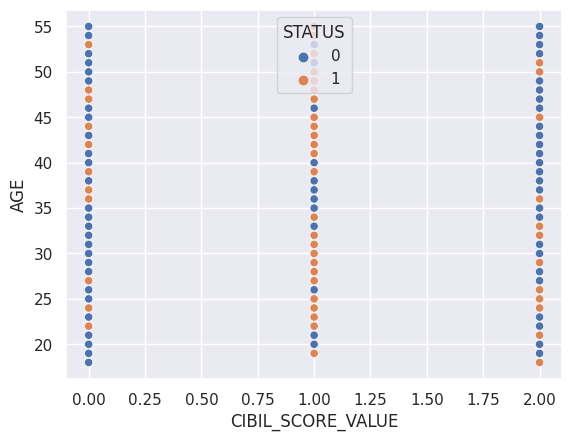

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names to verify
print(df.columns)

# Scatter plot with CIBIL_SCORE_VALUE on x-axis and AGE on y-axis, colored by STATUS
sns.scatterplot(x='CIBIL_SCORE_VALUE', y='AGE', hue='STATUS', data=df)

# Show plot
plt.show()



In [27]:
# Remove APPID column
df.drop(columns='APP_ID', inplace=True)
df.head()

,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,0,YES,1,0,31,F,3,0,0,1,4,2,36,0.0,0.767104,12,0
1,0,NO,1,1,40,F,2,1,1,0,1,1,12,2.0,0.619077,24,0
2,0,YES,1,0,27,F,3,0,0,1,2,2,72,0.0,0.848949,36,0
3,2,NO,1,1,33,M,2,0,1,0,2,1,120,1.0,0.515646,12,0
4,2,NO,1,1,29,F,1,0,1,1,2,1,24,2.0,0.614123,24,1


In [28]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [29]:
def check_same_values(dataset):
    return len(set(dataset)) == 1


if check_same_values(df):
    print("All values in the dataset are the same.")
else:
    print("Values in the dataset are not all the same.")


Values in the dataset are not all the same.


In [30]:
df.select_dtypes(include='int64').nunique()

CIBIL_SCORE_VALUE      3
CUS_CATGCODE           2
EMPLOYMENT_TYPE        2
AGE                   38
NO_OF_DEPENDENTS       4
MARITAL                2
EDU_QUA                2
P_RESTYPE              3
P_CATEGORY             4
EMPLOYEE_TYPE          3
MON_IN_OCC           160
TENURE                 4
STATUS                 2
dtype: int64

In [31]:
df.select_dtypes(include='float64').nunique()

INCOM_EXP_GMI        3
LTV              10040
dtype: int64

In [32]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

NEW_CUST: [1 0]
SEX: [0 1]


In [33]:
import pandas as pd

# Specify the columns you want to check for skewness
selected_columns = [ 'AGE', 'CIBIL_SCORE_VALUE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE']

# Check if all selected columns are present in the DataFrame
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
    print("Columns not found in the DataFrame:", missing_columns)
else:
    # Calculate skewness for each selected column
    skewness_values = df[selected_columns].skew()

    # Print the skewness values
    for column, skewness in skewness_values.iteritems():
        print("Skewness of {}: {:.2f}".format(column, skewness))


Skewness of AGE: 0.63
Skewness of CIBIL_SCORE_VALUE: -0.07
Skewness of MON_IN_OCC: 1.32
Skewness of INCOM_EXP_GMI: 0.64
Skewness of LTV: -0.64
Skewness of TENURE: 0.27


In [34]:
columns_to_exclude = ['SEX']
df_filtered = df.drop(columns=columns_to_exclude)

# Calculate correlation matrix
correlation_matrix = df_filtered.corr()

# Display the correlation matrix
print(correlation_matrix)

                   CIBIL_SCORE_VALUE  NEW_CUST  CUS_CATGCODE  EMPLOYMENT_TYPE  \
CIBIL_SCORE_VALUE           1.000000 -0.832315     -0.062113        -0.053539   
NEW_CUST                   -0.832315  1.000000      0.052458         0.062004   
CUS_CATGCODE               -0.062113  0.052458      1.000000        -0.046468   
EMPLOYMENT_TYPE            -0.053539  0.062004     -0.046468         1.000000   
AGE                         0.176364 -0.162115      0.030525        -0.189267   
NO_OF_DEPENDENTS            0.077063 -0.067989      0.006603        -0.078590   
MARITAL                     0.136502 -0.127525      0.041869        -0.141434   
EDU_QUA                     0.093796 -0.078660     -0.086445         0.127783   
P_RESTYPE                  -0.052456  0.049671      0.046271         0.091038   
P_CATEGORY                 -0.044414  0.042807      0.050780         0.026573   
EMPLOYEE_TYPE              -0.020729  0.030048      0.004030         0.335105   
MON_IN_OCC                  

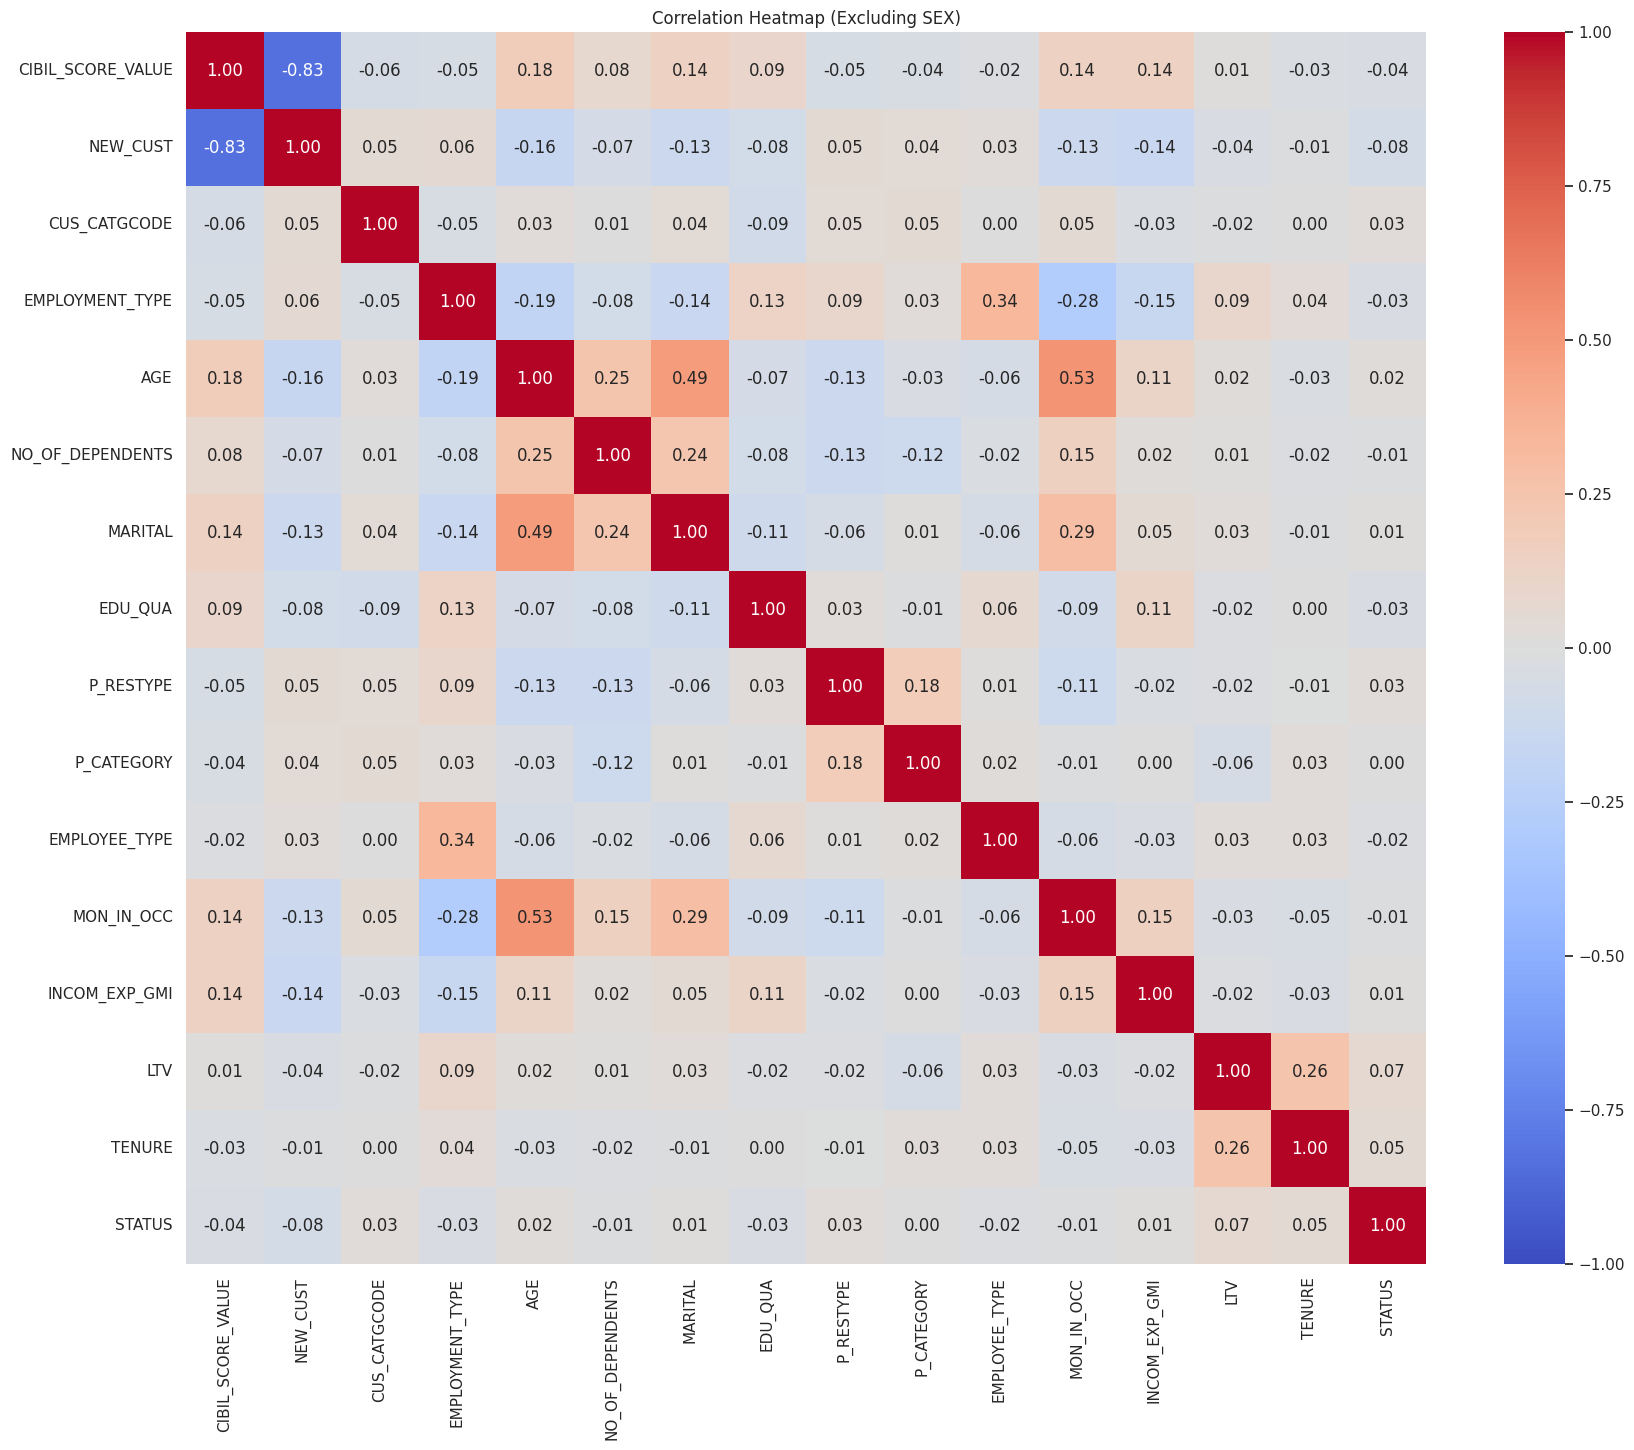

In [35]:
columns_to_exclude = [ "SEX" ]
df_filtered = df.drop(columns=columns_to_exclude)

# Calculate correlation matrix
correlation_matrix = df_filtered.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Excluding SEX)")
plt.show()

In [36]:
# Remove SEX AND MON_IN_OCC column
df.drop(columns=["CIBIL_SCORE_VALUE","SEX" ], inplace=True)
df.head(15)

,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,1,1,0,31,3,0,0,1,4,2,36,0.0,0.767104,12,0
1,0,1,1,40,2,1,1,0,1,1,12,2.0,0.619077,24,0
2,1,1,0,27,3,0,0,1,2,2,72,0.0,0.848949,36,0
3,0,1,1,33,2,0,1,0,2,1,120,1.0,0.515646,12,0
4,0,1,1,29,1,0,1,1,2,1,24,2.0,0.614123,24,1
5,1,0,1,26,2,0,0,0,2,1,48,0.0,0.607375,24,0
6,1,1,0,27,2,0,0,0,1,0,110,1.0,0.848485,12,0
7,1,1,1,38,2,1,0,0,1,1,26,0.0,0.899215,18,0
8,0,1,0,25,3,0,1,0,4,2,216,0.0,0.933250,24,0
9,1,1,1,26,0,0,0,0,2,1,36,2.0,0.682159,18,0


In [37]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('STATUS', axis=1)
y = df['STATUS']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [39]:
selected_columns = ['AGE',  'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE', "NO_OF_DEPENDENTS"]

# Get the descriptive statistics for the selected columns
desc_stats = df[selected_columns].describe(percentiles=[.25, .50, .75])

# Print the descriptive statistics
print("Descriptive Statistics for Selected Columns:")
print(desc_stats)

Descriptive Statistics for Selected Columns:
                AGE    MON_IN_OCC  INCOM_EXP_GMI           LTV        TENURE  \
count  13299.000000  13299.000000   13299.000000  13299.000000  13299.000000   
mean      32.473870     71.946161       0.667644      0.781083     24.792240   
std        8.804317     65.114130       0.762374      0.108869      7.501085   
min       18.000000      1.000000       0.000000      0.500000     12.000000   
25%       25.000000     24.000000       0.000000      0.719710     18.000000   
50%       31.000000     48.000000       0.000000      0.807537     24.000000   
75%       38.000000    100.000000       1.000000      0.849177     36.000000   
max       55.000000    240.000000       2.000000      1.000000     36.000000   

       NO_OF_DEPENDENTS  
count      13299.000000  
mean           1.536281  
std            0.971671  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            2.000000  
max            3.000000  


In [41]:
selected_columns = ['AGE',  'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE', "NO_OF_DEPENDENTS"]

# Get the descriptive statistics for the selected columns
desc_stats = df[selected_columns].describe(percentiles=[.25, .50, .75])

# Print the descriptive statistics with improved formatting
print("Descriptive Statistics for Selected Columns:")
print(desc_stats.to_string())


Descriptive Statistics for Selected Columns:
                AGE    MON_IN_OCC  INCOM_EXP_GMI           LTV        TENURE  NO_OF_DEPENDENTS
count  13299.000000  13299.000000   13299.000000  13299.000000  13299.000000      13299.000000
mean      32.473870     71.946161       0.667644      0.781083     24.792240          1.536281
std        8.804317     65.114130       0.762374      0.108869      7.501085          0.971671
min       18.000000      1.000000       0.000000      0.500000     12.000000          0.000000
25%       25.000000     24.000000       0.000000      0.719710     18.000000          1.000000
50%       31.000000     48.000000       0.000000      0.807537     24.000000          2.000000
75%       38.000000    100.000000       1.000000      0.849177     36.000000          2.000000
max       55.000000    240.000000       2.000000      1.000000     36.000000          3.000000


#RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [300, 350, 400, 500, 600],
    'max_depth': [ 5, 10, 15, 20, 25, 30, 35, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 8],
}


# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features="auto", n_estimators=500, class_weight='balanced', max_depth=40)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40,
                       max_features='auto', n_estimators=500)

In [40]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 62.56 %


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Test Recall (Sensitivity):', recall_score(y_test, y_pred, average='micro'))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6255639097744361
Precision Score :  0.6255639097744361
Test Recall (Sensitivity): 0.6255639097744361
Recall Score :  0.6255639097744361
Jaccard Score :  0.4551422319474836
Log Loss :  13.496044652466422


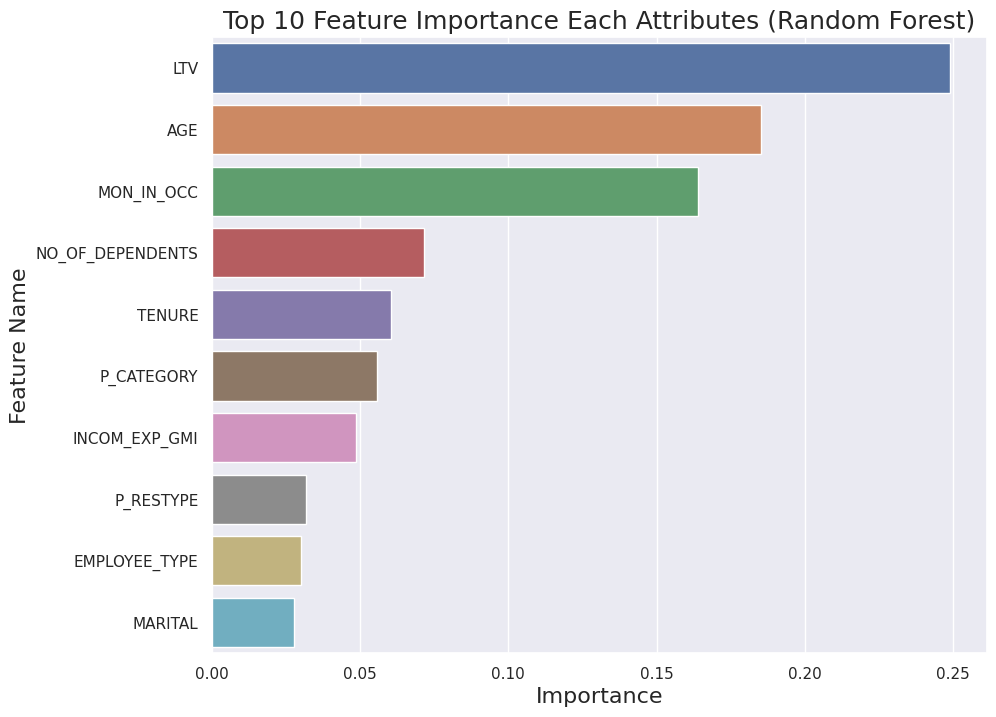

In [42]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.6255639097744361')

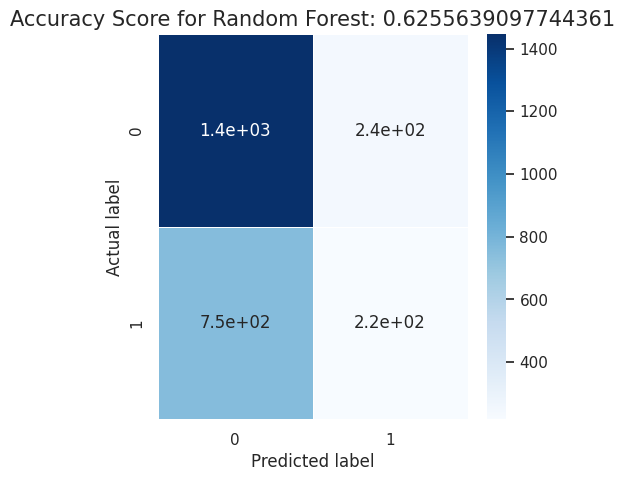

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

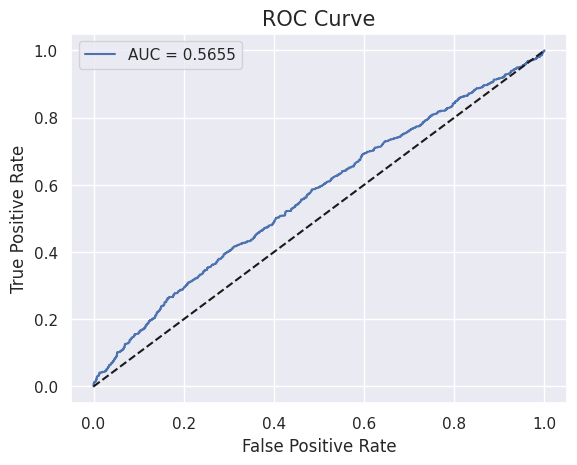

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#XGBOOST

In [73]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [ 50, 100, 150],
    'learning_rate': [0.001,0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.2],
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
grid_search.best_score_

0.6197951242704788

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0, learning_rate=0.001, max_depth=3, n_estimators=50)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 63.72 %


In [76]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Test Recall (Sensitivity):', recall_score(y_test, y_pred, average='micro'))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6372180451127819
Precision Score :  0.6372180451127819
Recall Score :  0.6372180451127819
Test Recall (Sensitivity): 0.6372180451127819
Jaccard Score :  0.4675862068965517
Log Loss :  13.075987037781223


Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.6372180451127819')

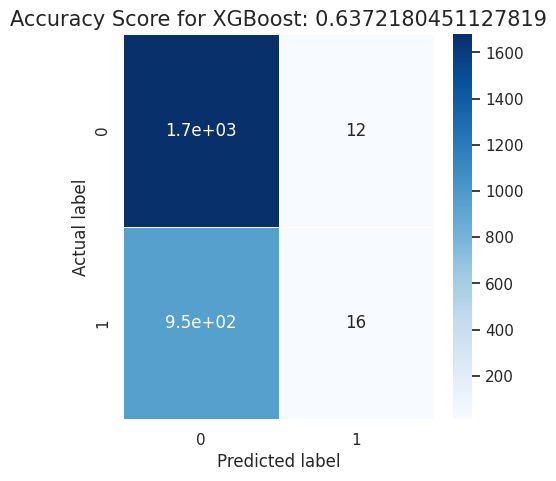

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

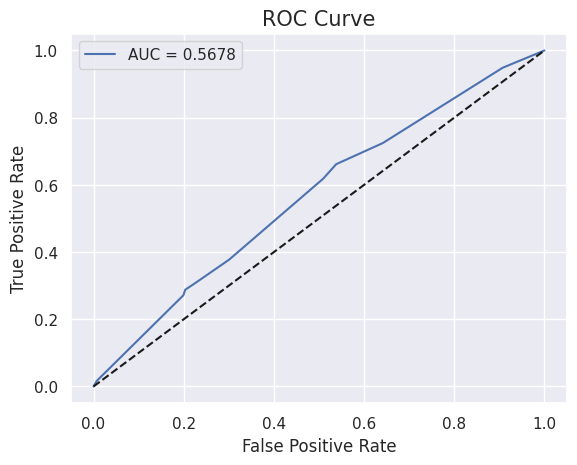

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#DECISSION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [5, 10, 15, 20, ],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2' ],

}
# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion= 'gini', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, max_depth=10, class_weight='balanced')
dtree.fit(X_test, y_test)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=5)

In [40]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 72.97 %


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print('F-1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', precision_score(y_test, y_pred, average='micro'))
print('Test Recall (Sensitivity):', recall_score(y_test, y_pred, average='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print('Jaccard Score:', jaccard_score(y_test, y_pred, average='micro'))
print('Log Loss:', log_loss(y_test, y_pred))

F-1 Score: 0.7296992481203008
Precision Score: 0.7296992481203007
Test Recall (Sensitivity): 0.7296992481203007
Recall Score: 0.7296992481203007
Jaccard Score: 0.5744303048239124
Log Loss: 9.742626611569637


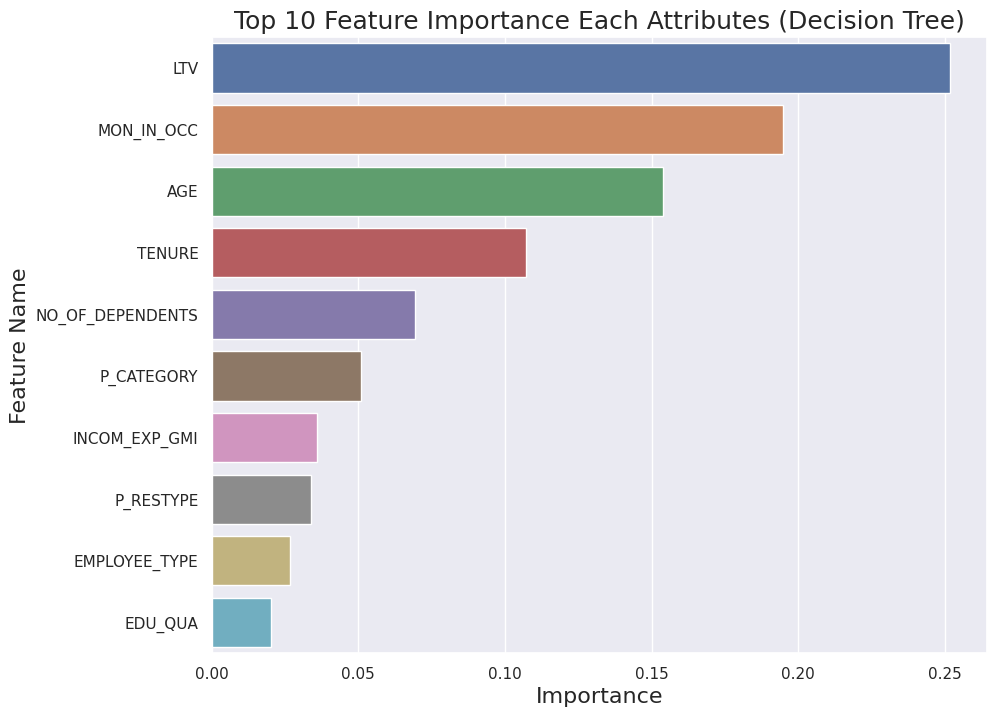

In [42]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7296992481203007')

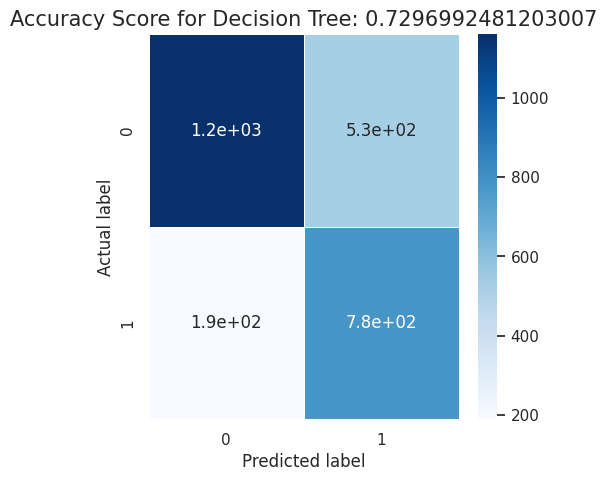

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

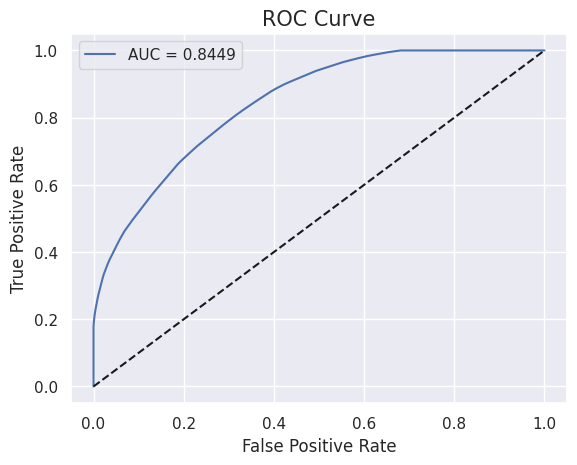

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

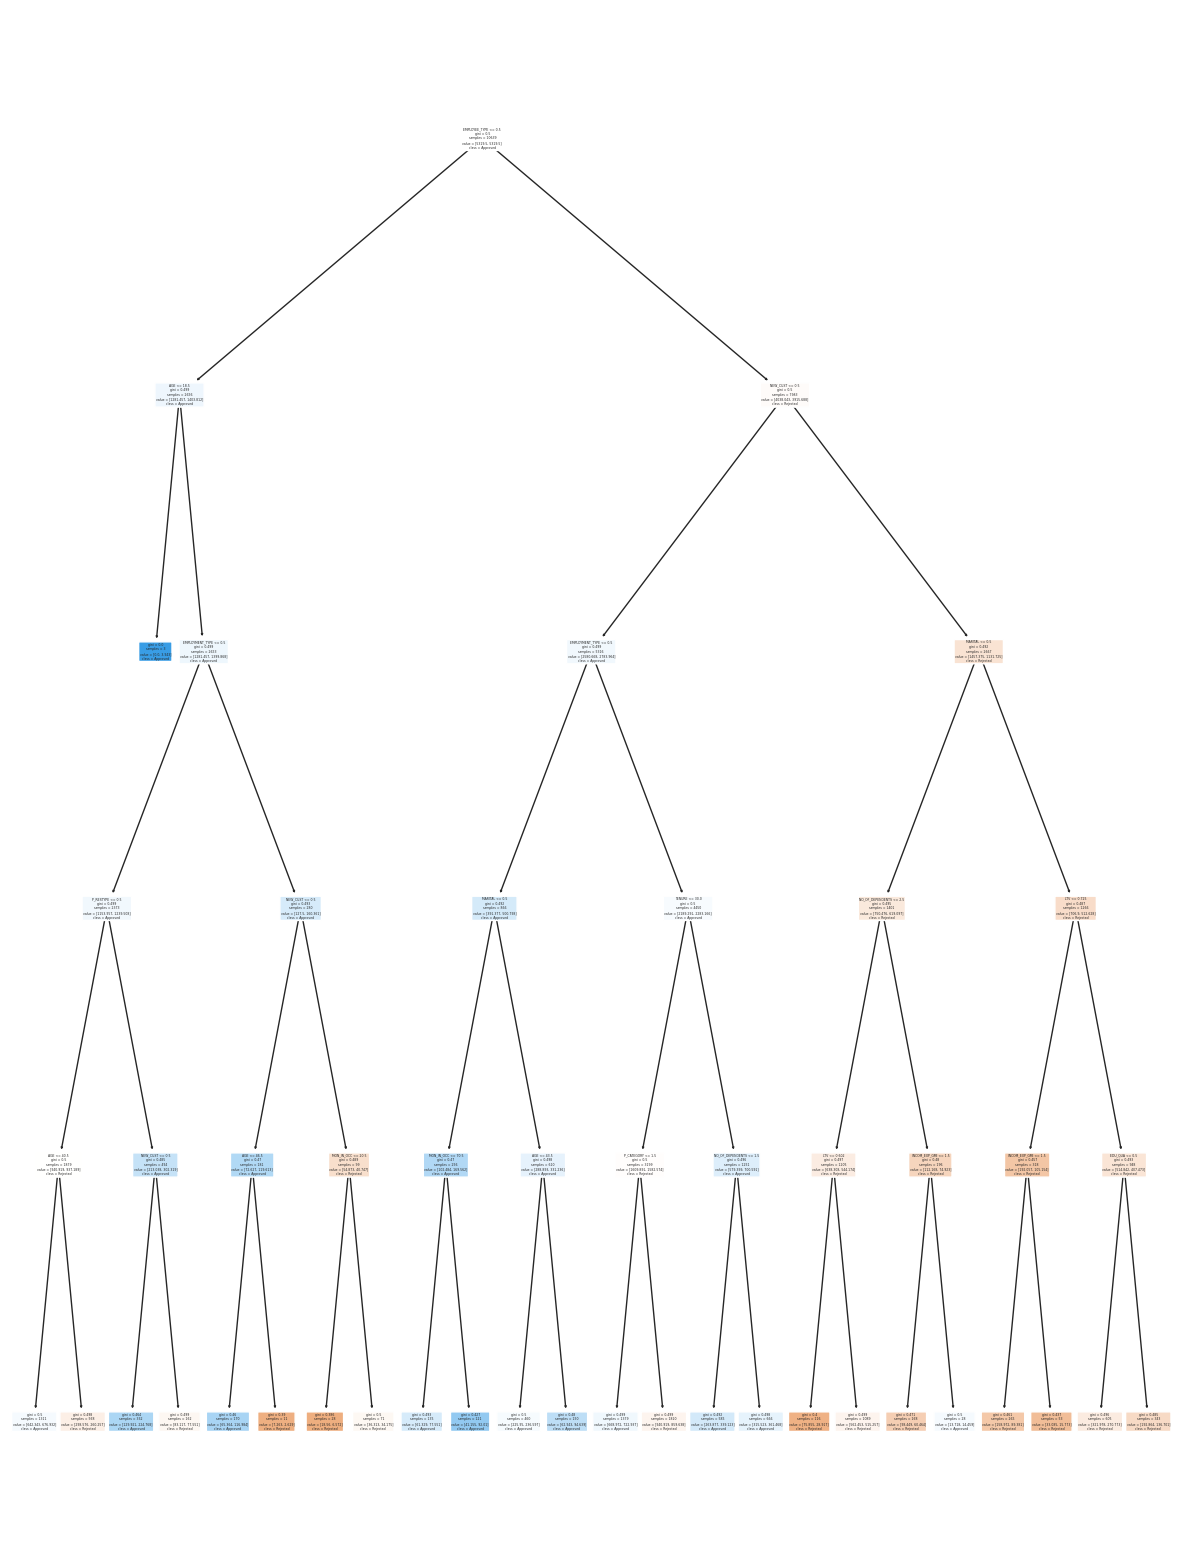

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_dtree = grid_search.best_estimator_

plt.figure(figsize=(15, 20))
plot_tree(best_dtree, feature_names=X_train.columns, class_names=["Rejected", "Approved"], filled=True, rounded=True)
plt.savefig('decision_tree.png')  # Save the tree visualization as an image
